<a href="https://colab.research.google.com/github/aleksandrlozko/Mathematical-Modeling/blob/main/%D0%9F%D1%80%D0%BE%D0%BA%D0%B0%D1%82_%D0%B2%D0%B5%D0%BB%D0%BE%D1%81%D0%B8%D0%BF%D0%B5%D0%B4%D1%96%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<left>
    <img src="https://kpi.ua/files/images/kpi.png" width="300" alt="kpi logo"  />
</left>

**Моделювання системи байкшерінгу**

## Зміст

* Вступ
* Імпорт бібліотек та допоміжних функцій
* Збір та початкова обробка даних
* Аналіз даних
* Побудова моделі
* Висновки
* Використані джерела



## Вступ

Пандемія коронавірусу істотно вплинула на міську мобільність, при цьому, користування громадським транспортом суттєво знизилось внаслідок ризиків зараження. Як наслідок, просування альтернативних видів транспорту, зокрема, систем прокату велосипедів (байкшерінгу), набуло нового імпульсу. Отже, наразі актуальною є задача моделювання та прогозування ефективності системи байкшерінгу на основі інформації по вже існуючим системам. В даній роботі за основу взята система Capital Bikeshare - американська система байкшерінгу, що обслуговує місто Вашингтон, та його агломерацію.

## Імпорт бібліотек та допоміжних функцій

1. pandas
2. numpy
3. matplotlib.pyplot
4. seaborn
5. sklearn.model_selection.train_test_split
6. sklearn.metrics.mean_squared_error
7. sklearn.linear_model.LinearRegression
8. sklearn.ensemble.RandomForestRegressor
9. sklearn.ensemble.GradientBoostingRegressor

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

## Збір та початкова обробка даних

Для побудування моделі байкшерінгу будемо використовувати дані за американською системою Capital Bikeshare. Цей набір даних містить погодинну кількість велосипедів, взятих напрокат у період з 2011 по 2012 роки з додатковою сезонною інформацією. 

Із використанням бібліотеки ***pandas*** на основі csv-файлу створимо відповідний датафрейм: 

In [ ]:
df = pd.read_csv("/content/sample_data/capital_bikeshare.csv")
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


***Коментар до таблиці:***

- instant: індекс запису;
- dteday: дата;
- season: сезон (1: весна, 2: літо, 3: осінь, 4: зима);
- yr: рік (0: 2011, 1: 2012);
- mnth : місяць ( 1: січень, 2: лютий, ..., 12: грудень);
- hr: година (від 0 до 23);
- holiday: вихідний/не вихідний;
- weekday: день тижня;
- workingday: робочий/неробочий день;
- weathersit: погодні обставини (weather situation) 
    - 1: ясно/невелика хмарність
    - 2: туман та хмарно
    - 3: незначний сніг/дощ
    - 4: сильний дощ/гроза/сніг та туман/ожеледиця
- temp: нормоване реальне значення температури по Цельсію (значення температури поділене на її максимальне значення: 41);
- atemp: нормоване значення температури, що відчувається, по Цельсію (значення поділене не максимум: 50);
- hum: нормоване значення вологості (поділене на максимум: 100);
- windspeed: нормована швидкість вітру (поділена на максимум: 67);
- casual: кількість незареєстрованих користувачів;
- registered: кількість зареєстрованих користувачів;
- cnt: загальна кількість користувачів

Видалимо стовпці, що відповідають значенням окремої кількості зареєстрованих та незареєстрованих користувачів:

In [ ]:
# видалення стовпців "casual" та "registered"
df.drop(['casual', 'registered'], axis=1, inplace=True)

Змінимо тип даних у колонках "dteday", "season", "weekday" та "mnth":

In [ ]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['season'] = df['season'].astype("category")
df['weekday'] = df['weekday'].astype("category")
df['mnth'] = df['mnth'].astype("category")
 
# перевірка типу даних
df.dtypes

instant                int64
dteday        datetime64[ns]
season              category
yr                     int64
mnth                category
hr                     int64
holiday                int64
weekday             category
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
cnt                    int64
dtype: object

Перевірмо датафрейм на наявність пропущених даних:

In [ ]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

Як бачимо, в жодному полі немає пропущеного значення.

Перевіримо датафрейм на наявність дубльованих даних:

In [ ]:
df.duplicated().sum()

0

Як бачимо, дубльовані дані відсутні.

З використанням функції ***describe***, можемо отримати статистичну інформацію (кількість, середнє значення, стандартне відїилення, мінімум, 1-й, 2-й та 3-й квартилі, максимум) по кожному з полів:

In [ ]:
df.describe()

,instant,yr,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,11.546752,0.028770,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,5017.0295,0.500008,6.914405,0.167165,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,6.000000,0.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8690.0000,1.000000,12.000000,0.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,13034.5000,1.000000,18.000000,0.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.0000,1.000000,23.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


## Аналіз даних

Задля зручності подальшої роботи із створеним в попередній частині датафреймом, змінимо за допомогою методу ***rename*** назви деяких колонок:

In [ ]:
df.rename(columns={'instant': 'Індекс', 'dteday': 'Дата', 'season': 'Сезон',
                   'yr': 'Рік', 'mnth': 'Місяць', 'hr': 'Година', 'holiday': 'Свято',
                   'weekday': 'День тижня', 'cnt': 'Користувачі'}, 
         inplace=True)

# виведемо декілько перших рядків зміненого датафрейму
df.head()

,Індекс,Дата,Сезон,Рік,Місяць,Година,Свято,День тижня,workingday,weathersit,temp,atemp,hum,windspeed,Користувачі
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


Text(0, 0.5, 'Користувачі')

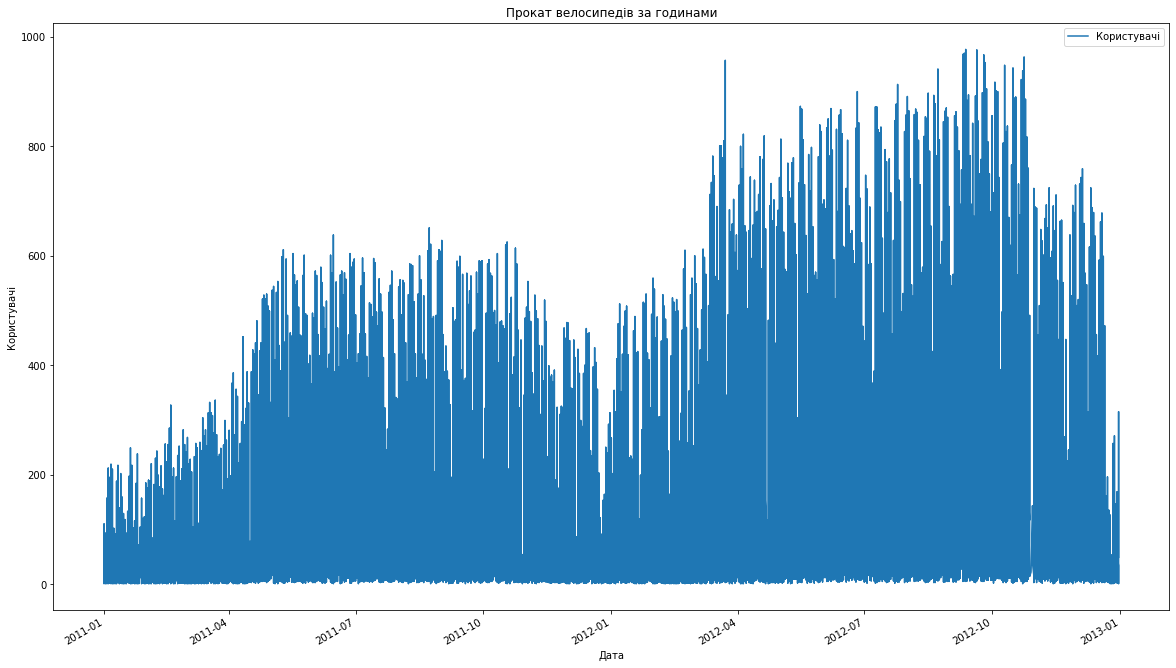

In [ ]:
df.plot(x='Дата', y='Користувачі', figsize=(20,12), title='Прокат велосипедів за годинами')
plt.ylabel('Користувачі')

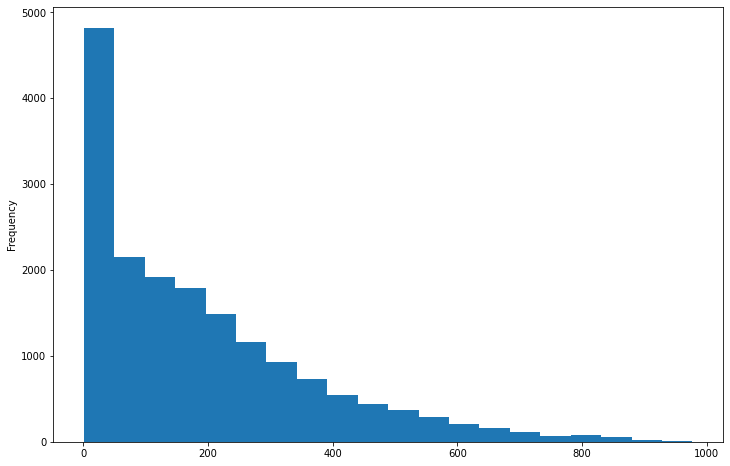

In [ ]:
df['Користувачі'].plot.hist(bins=20, figsize=(12,8))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Прокат велосипедів за місяцями')

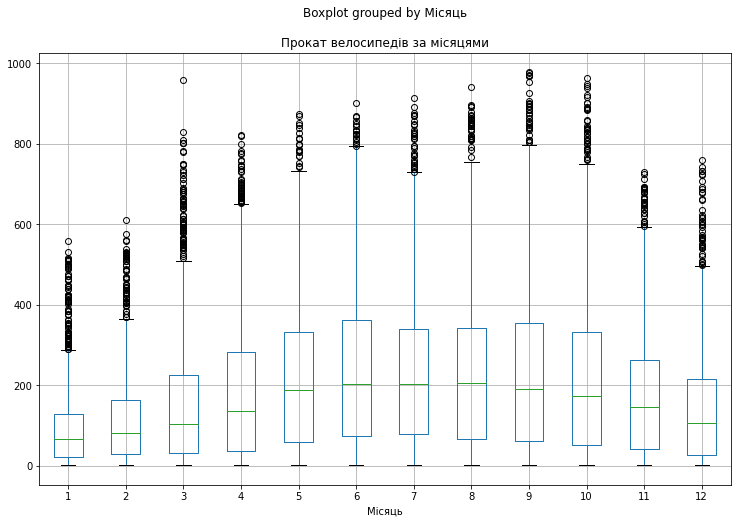

In [ ]:
df.boxplot(by='Місяць', column='Користувачі', figsize=(12,8))
plt.title("Прокат велосипедів за місяцями")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Прокат велосипедів за роками')

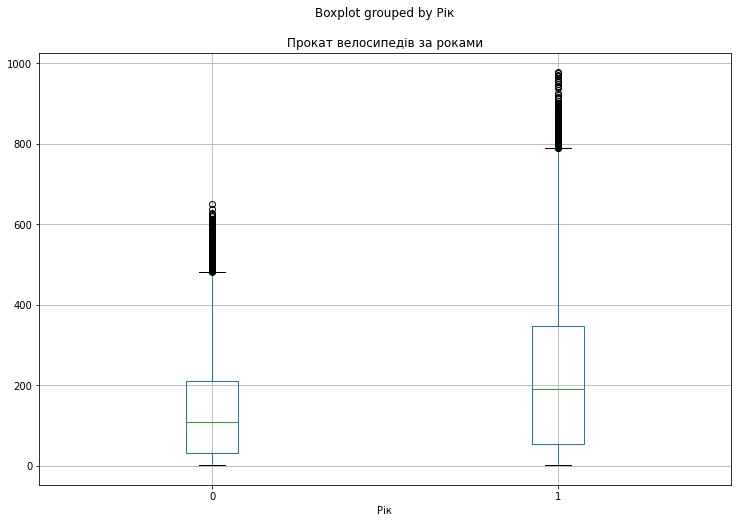

In [ ]:
df.boxplot(by='Рік', column='Користувачі', figsize=(12,8))
plt.title("Прокат велосипедів за роками")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Прокат велосипедів за сезонами')

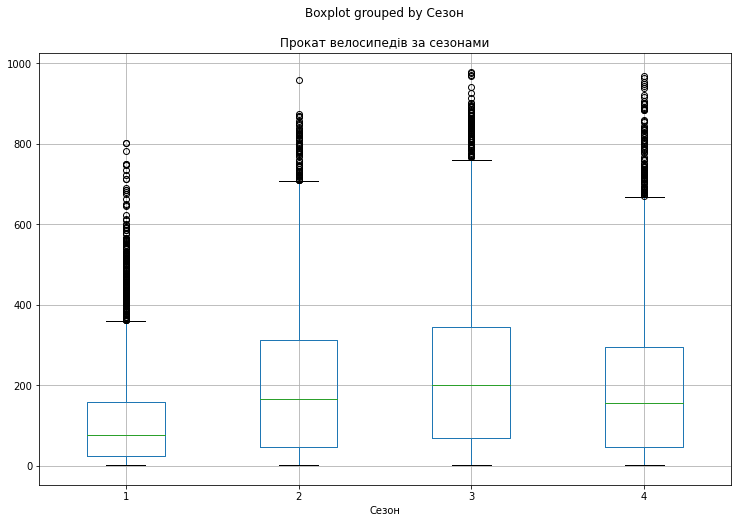

In [ ]:
df.boxplot(by='Сезон', column='Користувачі', figsize=(12,8))
plt.title("Прокат велосипедів за сезонами")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Прокат велосипедів за сезонами та роками')

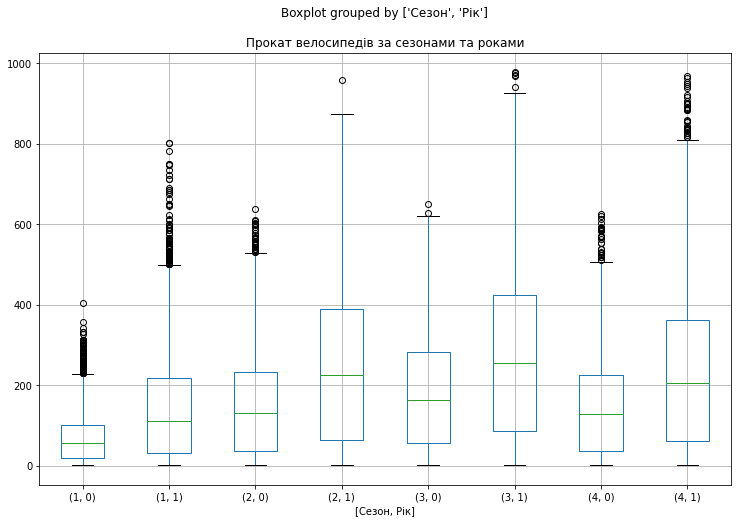

In [ ]:
df.boxplot(by=['Сезон','Рік'], column='Користувачі', figsize=(12,8))
plt.title("Прокат велосипедів за сезонами та роками")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Прокат велосипедів за годинами')

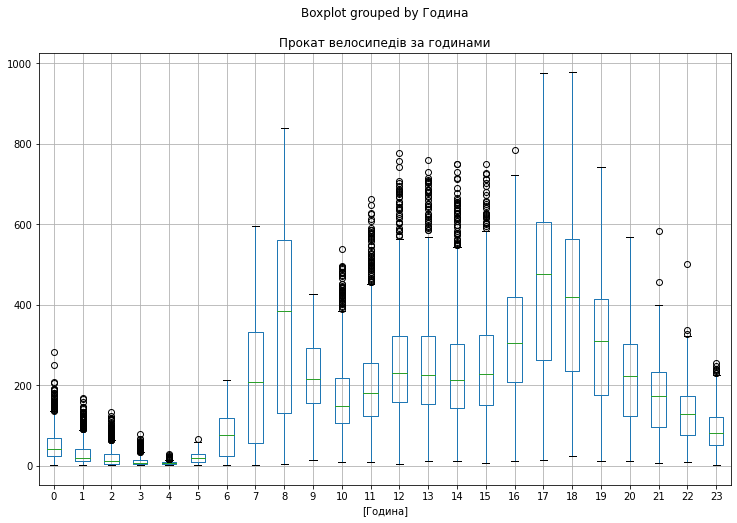

In [ ]:
df.boxplot(by=['Година'], column='Користувачі', figsize=(12,8))
plt.title("Прокат велосипедів за годинами")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Прокат велосипедів за днями тижня')

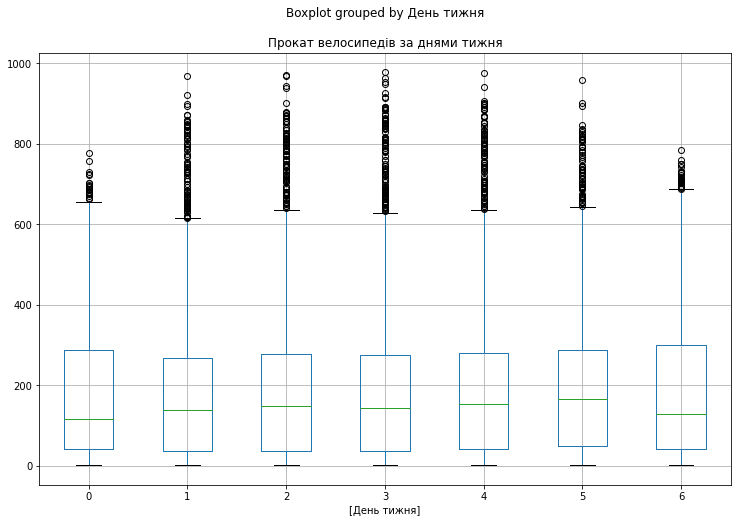

In [ ]:
df.boxplot(by=['День тижня'], column='Користувачі', figsize=(12,8))
plt.title("Прокат велосипедів за днями тижня")

In [ ]:
# кореляція 
df.corr()

,Індекс,Рік,Година,Свято,workingday,weathersit,temp,atemp,hum,windspeed,Користувачі
Індекс,1.000000,0.866014,-0.004775,0.014723,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.278379
Рік,0.866014,1.000000,-0.003867,0.006692,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.250495
Година,-0.004775,-0.003867,1.000000,0.000479,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.394071
Свято,0.014723,0.006692,0.000479,1.000000,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,-0.030927
workingday,-0.003416,-0.002196,0.002285,-0.252471,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,0.030284
weathersit,-0.014198,-0.019157,-0.020203,-0.017036,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.142426
temp,0.136178,0.040913,0.137603,-0.027340,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.137615,0.039222,0.133750,-0.030973,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.400929
hum,0.009577,-0.083546,-0.276498,-0.010588,0.015688,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.074505,-0.008740,0.137252,0.003988,-0.011830,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.093234


Обчислимо кореляцію кількості користувачів та інших параметрів:

In [ ]:
df.drop('Користувачі', axis=1).corrwith(df.Користувачі)

Індекс        0.278379
Рік           0.250495
Година        0.394071
Свято        -0.030927
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
dtype: float64

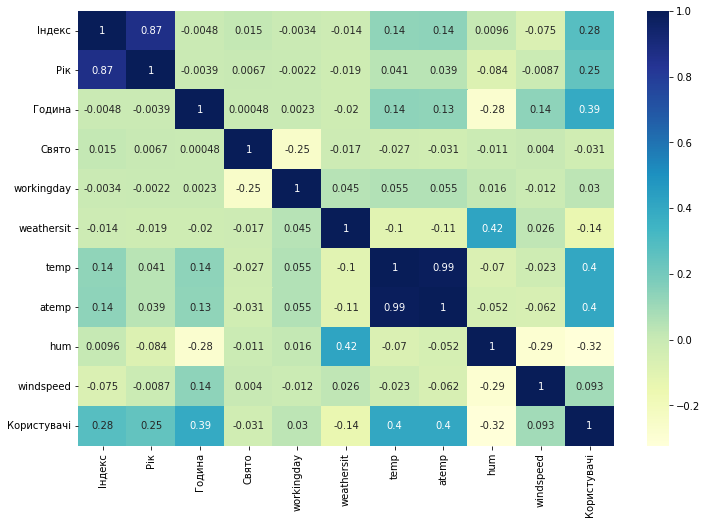

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

Істотна кореляція параметрів ***temp*** та ***atemp*** призводить до так званої мультикореляції, тому має сенс залишити лише один з цих параметрів, temp:

In [ ]:
df.drop('temp', axis=1, inplace=True)

Видалемо стовпець дати, оскільки він не буде використовуватись в подальшій роботі з моделю:

In [ ]:
df.drop('Дата', axis=1, inplace=True)

## Побудова моделі


In [ ]:
df = pd.get_dummies(df)

Для подальшої побудови моделей розіб'ємо набір даних на навчальний та тестовий у співвідношенні 75% на 25%.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Користувачі', axis=1), df.Користувачі, test_size=0.25, random_state=5)

Модель лінійної регресії:

In [ ]:
reg = LinearRegression().fit(X_train, y_train)


print(np.sqrt(mean_squared_error(y_train, reg.predict(X_train))))


print(np.sqrt(mean_squared_error(y_test, reg.predict(X_test))))

139.62836645456494
141.71698916214228


Модель випадкового лісу:

In [ ]:
rf = RandomForestRegressor().fit(X_train, y_train)

print(np.sqrt(mean_squared_error(y_train, rf.predict(X_train))))

print(np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))


15.429164015999778
41.16105777850394


Модель градієнтного бустінгу:

In [ ]:
gb = GradientBoostingRegressor().fit(X_train, y_train)

print(np.sqrt(mean_squared_error(y_train, gb.predict(X_train))))


print(np.sqrt(mean_squared_error(y_test, gb.predict(X_test))))


66.13807374698403
66.73233029671526


In [ ]:
Отже, найкращою моделлю є випадковий ліс.

SyntaxError: ignored

Статистичний аналіз:

In [ ]:
feat_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=["Вплив на кількість користувачів"])
feat_importances.sort_values(by="Вплив на кількість користувачів", ascending=False, inplace=True)
feat_importances

,Вплив на кількість користувачів
Година,0.578192
Індекс,0.170690
atemp,0.089109
workingday,0.085852
hum,0.026249
weathersit,0.016285
windspeed,0.007704
День тижня_5,0.004917
День тижня_6,0.002215
День тижня_0,0.002132


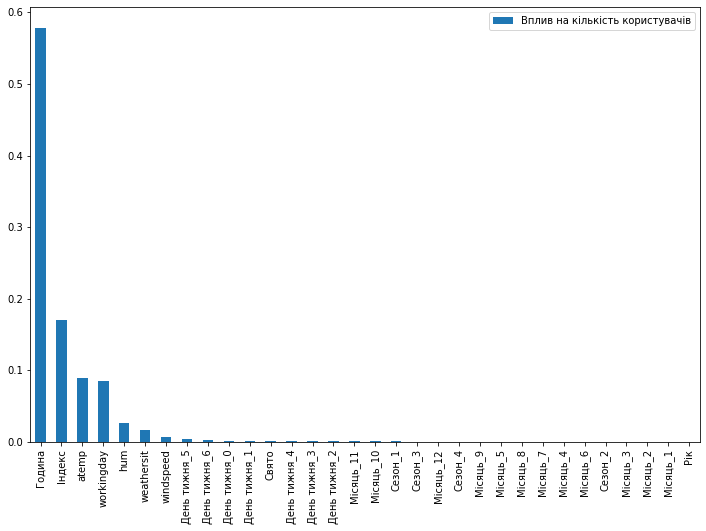

In [ ]:
feat_importances.plot(kind='bar', figsize=(12,8))

Прогноз:

In [ ]:
rf = RandomForestRegressor().fit(df.drop('Користувачі', axis=1), df.Користувачі)

df['Predictions'] = rf.predict(df.drop('Користувачі', axis=1))
df

,Індекс,Рік,Година,Свято,workingday,weathersit,atemp,hum,windspeed,Користувачі,Сезон_1,Сезон_2,Сезон_3,Сезон_4,Місяць_1,Місяць_2,Місяць_3,Місяць_4,Місяць_5,Місяць_6,Місяць_7,Місяць_8,Місяць_9,Місяць_10,Місяць_11,Місяць_12,День тижня_0,День тижня_1,День тижня_2,День тижня_3,День тижня_4,День тижня_5,День тижня_6,Predictions
0,1,0,0,0,0,1,0.2879,0.81,0.0000,16,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21.84
1,2,0,1,0,0,1,0.2727,0.80,0.0000,40,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,34.14
2,3,0,2,0,0,1,0.2727,0.80,0.0000,32,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,26.60
3,4,0,3,0,0,1,0.2879,0.75,0.0000,13,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11.63
4,5,0,4,0,0,1,0.2879,0.75,0.0000,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,19,0,1,2,0.2576,0.60,0.1642,119,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,117.01
17375,17376,1,20,0,1,2,0.2576,0.60,0.1642,89,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,96.09
17376,17377,1,21,0,1,1,0.2576,0.60,0.1642,90,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,76.36
17377,17378,1,22,0,1,1,0.2727,0.56,0.1343,61,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,61.89


In [ ]:
df.head()

,Індекс,Рік,Година,Свято,workingday,weathersit,atemp,hum,windspeed,Користувачі,Сезон_1,Сезон_2,Сезон_3,Сезон_4,Місяць_1,Місяць_2,Місяць_3,Місяць_4,Місяць_5,Місяць_6,Місяць_7,Місяць_8,Місяць_9,Місяць_10,Місяць_11,Місяць_12,День тижня_0,День тижня_1,День тижня_2,День тижня_3,День тижня_4,День тижня_5,День тижня_6,Predictions
0,1,0,0,0,0,1,0.2879,0.81,0.0,16,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21.84
1,2,0,1,0,0,1,0.2727,0.80,0.0,40,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,34.14
2,3,0,2,0,0,1,0.2727,0.80,0.0,32,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,26.60
3,4,0,3,0,0,1,0.2879,0.75,0.0,13,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11.63
4,5,0,4,0,0,1,0.2879,0.75,0.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.45


## Висновки

На основі побудованої моделі виявили, що кількість користувачів системи байкшерінгу залежить насамперед від години та температури. Крім того, моделі випадкового лісу та градієнтного бустінгу були ефективнішими, ніж модель лінійної регресії.

## Використані джерела

1. capitalbikeshare.com
2. https://en.wikipedia.org/wiki/Linear_regression
3. https://en.wikipedia.org/wiki/Random_forest
4. https://en.wikipedia.org/wiki/Gradient_boosting
5. Modeling and Simulation in Python, Allen B. Downey
6. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html
